In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#!pip install pandas
%pwd

'C:\\Users\\rb\\Downloads'

In [2]:
############################
#####  SET THESE VARS  #####
############################
target_size  = (128, 128)
input_shape  = (128, 128, 3)
batch_size   = 32
epoch_count  = 10
LINUX = False

if LINUX:
    BodyPartPath = '/tf/C/Desktop/Collapsed'
    BrokenPath   = '/tf/C/Desktop/BrokenNotBroken'
else:
    BodyPartPath = r'C:\Users\rb\OneDrive - Balaian\School\Capstone\Collapsed'
    BrokenPath   = r'C:\Users\rb\OneDrive - Balaian\School\Capstone\BrokenNotbroken'

print(BodyPartPath)
print(BrokenPath)

print('thank you for setting vars')

C:\Users\rb\OneDrive - Balaian\School\Capstone\Collapsed
C:\Users\rb\OneDrive - Balaian\School\Capstone\BrokenNotbroken
thank you for setting vars


In [3]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from numpy import array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

print('Tensorflow version: ', tf.__version__)
print('Keras version     : ', keras.__version__)

# GPU SETUP (YOU MAY NEED TO SKIP THIS) 
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)
tf.config.list_physical_devices()

# FOR DEBUG of GPU USE SET TO TRUE
tf.debugging.set_log_device_placement(False)

Tensorflow version:  2.5.0-dev20201123
Keras version     :  2.5.0
Num GPUs Available:  1


In [4]:
def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(history.epoch, np.array(history.history['accuracy']), label='Train Accuracy')
  plt.plot(history.epoch, np.array(history.history['val_accuracy']), label = 'Val Accuracy')
  plt.legend()
  plt.ylim([0, 1])

In [9]:
#def train_broken():

if LINUX:
    train_path = BrokenPath + '/train'
    valid_path = BrokenPath + '/valid'
else:
    train_path = BrokenPath + '\\train'
    valid_path = BrokenPath + '\\valid'

train_datagen = ImageDataGenerator(
    rescale = 1.0 / 255.0,     
    rotation_range = 90, 
    horizontal_flip = True)

valid_datagen = ImageDataGenerator(
    rescale = 1.0 / 255.0)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = target_size,
    batch_size = batch_size,
    class_mode = "binary",
    seed = 123)

valid_generator = valid_datagen.flow_from_directory(
    valid_path,
    target_size = target_size,
    batch_size = batch_size,
    class_mode = "binary",
    seed = 123)

model = Sequential()

model.add(Conv2D(32, (5, 5), padding = 'same', input_shape = input_shape))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3), padding = 'same'))
model.add(MaxPooling2D())
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(96, (3, 3), padding = 'same'))
model.add(MaxPooling2D())
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(128, (3, 3), padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(160, (3, 3), padding = 'same'))
model.add(MaxPooling2D())
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(192,(3, 3), padding = 'same'))
model.add(MaxPooling2D())
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Flatten())

model.add(Dense(64))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dense(1))              
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Found 36806 images belonging to 2 classes.
Found 3197 images belonging to 2 classes.
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 128, 128, 32)      2432      
_________________________________________________________________
batch_normalization_24 (Batc (None, 128, 128, 32)      128       
_________________________________________________________________
activation_27 (Activation)   (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 128, 128, 64)      18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
batch_normalization_25 (Batc (None, 64, 64, 64)        256       
___________________________________

Epoch 1/12
1151/1151 [==============================] - 173s 149ms/step - loss: 0.6824 - accuracy: 0.5788 - val_loss: 0.7155 - val_accuracy: 0.5524
Epoch 2/12
1151/1151 [==============================] - 172s 149ms/step - loss: 0.6468 - accuracy: 0.6224 - val_loss: 0.8171 - val_accuracy: 0.5214
Epoch 3/12
1151/1151 [==============================] - 172s 150ms/step - loss: 0.6203 - accuracy: 0.6575 - val_loss: 0.6310 - val_accuracy: 0.6556
Epoch 4/12
1151/1151 [==============================] - 173s 150ms/step - loss: 0.6004 - accuracy: 0.6835 - val_loss: 0.7513 - val_accuracy: 0.6062
Epoch 5/12
1151/1151 [==============================] - 172s 149ms/step - loss: 0.5868 - accuracy: 0.6923 - val_loss: 0.6003 - val_accuracy: 0.6766
Epoch 6/12
1151/1151 [==============================] - 172s 150ms/step - loss: 0.5670 - accuracy: 0.7077 - val_loss: 0.6307 - val_accuracy: 0.6547
Epoch 7/12
1151/1151 [==============================] - 172s 150ms/step - loss: 0.5588 - accuracy: 0.7177 - val_

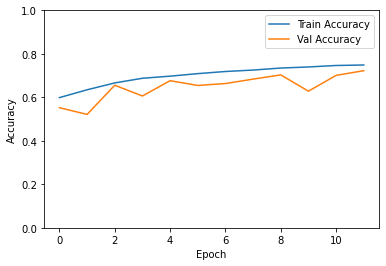

In [10]:
history = model.fit(train_generator, epochs = 12, validation_data = valid_generator)

plot_history(history)